### Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

In [2]:
df=pd.read_csv(r'C:\Users\91703\Downloads\Vehicle_Performance_Prediction.csv')

In [3]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [4]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

In [7]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


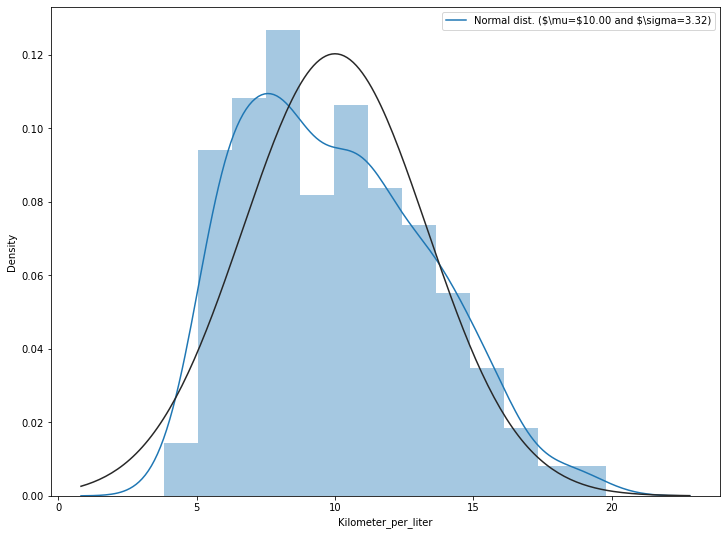

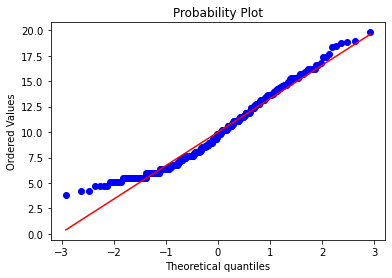

In [8]:
plt.subplots(figsize =(12,9))
sns.distplot(df['Kilometer_per_liter'], fit = stats.norm)

#get the fitted parameter used by the function
(mu,sigma) = stats.norm.fit(df['Kilometer_per_liter'])

#plot with the distribution
plt.legend(['Normal dist. ($\mu=${:.2f} and $\sigma={:.2f})'.format(mu,sigma)], loc='best')

#Probability Plot
fig = plt.figure()
stats.probplot(df['Kilometer_per_liter'], plot=plt)
plt.show()

### Step 2: Checking for the Null values

In [9]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [10]:
df.isna().values.any()

False

In [11]:
df.horsepower.value_counts().head()

150    22
90     20
88     19
110    18
100    17
Name: horsepower, dtype: int64

In [12]:
df.replace('?', np.nan, inplace = True)

In [13]:
df.isna().sum()

origin                 0
cylinders              0
displacement           0
horsepower             6
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [14]:
avg_hp = df['horsepower'].astype('float').mean(axis=0)
avg_hp

104.46938775510205

In [15]:
df['horsepower'].replace(np.nan, avg_hp, inplace=True)  

In [16]:
df.isna().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [17]:
df[['horsepower']] = df[['horsepower']].astype('float')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [19]:
df = df.drop(['name'], axis=1)

In [20]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,7.227443


In [21]:
df.corr()['Kilometer_per_liter'][df.corr()['Kilometer_per_liter'] > 0.1].sort_values(ascending=False)

Kilometer_per_liter    1.000000
year                   0.579267
origin                 0.563450
acceleration           0.420289
Name: Kilometer_per_liter, dtype: float64

In [22]:
#sns.regplot(x='acceleration', y='Kilometer_per_liter', data=df)

In [23]:
#sns.regplot(x='year', y='Kilometer_per_liter', data=df)

In [24]:
#sns.regplot(x='cylinders', y='Kilometer_per_liter', data=df)

In [25]:
#sns.regplot(x='displacement', y='Kilometer_per_liter', data=df)

In [26]:
#sns.regplot(x='weight', y='Kilometer_per_liter', data=df)

### Step 3:  Base Line Model

In [27]:
y = df['Kilometer_per_liter']
x = df.drop('Kilometer_per_liter', axis=1)

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(x,y)

LinearRegression()

In [30]:
yhat = lm.predict(x)

In [31]:
print('R_sq using Linear Regression:', r2_score(df['Kilometer_per_liter'], yhat))
print('MSE using Linear Regression:', mean_squared_error(df['Kilometer_per_liter'], yhat))
print('RMSE using Linear Regression:', np.sqrt(mean_squared_error(df['Kilometer_per_liter'], yhat)))

R_sq using Linear Regression: 0.8209019153884958
MSE using Linear Regression: 1.972591897574898
RMSE using Linear Regression: 1.404489906540769


In [32]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,7.227443


### Step 4:  Standardization

In [33]:
scale = StandardScaler()   

In [34]:
x_sc = scale.fit_transform(x)

In [35]:
lm_sc = lm.fit(x_sc, y)

In [36]:
yhat_sc = lm.predict(x_sc)

In [37]:
print('R_sq using Linear Regression:', r2_score(df['Kilometer_per_liter'], yhat_sc))
print('MSE using Linear Regression:', mean_squared_error(df['Kilometer_per_liter'], yhat_sc))
print('RMSE using Linear Regression:', np.sqrt(mean_squared_error(df['Kilometer_per_liter'], yhat_sc)))

R_sq using Linear Regression: 0.820901915388496
MSE using Linear Regression: 1.9725918975748962
RMSE using Linear Regression: 1.4044899065407683


### Step 5:  Train Test Split and Linear Regression

In [38]:
x_train, x_test, y_train, y_test =  train_test_split(x_sc, y, test_size = 0.3, random_state = 1)

In [39]:
model = LinearRegression()

In [40]:
model.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(x_test)
y_pred[1]

11.22932172013844

In [42]:
print('R_sq using Linear Regression:', r2_score(y_test, y_pred))
print('MSE using Linear Regression:', mean_squared_error(y_test, y_pred))
print('RMSE using Linear Regression:', np.sqrt(mean_squared_error(y_test, y_pred)))

R_sq using Linear Regression: 0.8469962763466173
MSE using Linear Regression: 1.6169027076249989
RMSE using Linear Regression: 1.2715748926528074


In [43]:
print('Accuracy', model.score(x_test, y_test)*100)
print('Accuracy', model.score(x_train, y_train)*100)

Accuracy 84.69962763466174
Accuracy 80.81709162389433


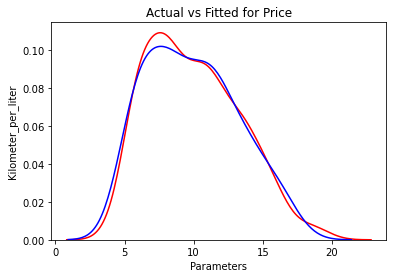

In [44]:
ax1 = sns.distplot(df['Kilometer_per_liter'], hist=False, color='r', label='Actual Values')
sns.distplot(y_test, hist=False, color='b', label='Fitted values', ax=ax1)
plt.title('Actual vs Fitted for Price')
plt.xlabel('Parameters')
plt.ylabel('Kilometer_per_liter')
plt.show()

### Step 6:  Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)

In [46]:
x_pr_train = pr.fit_transform(x_train)   # train
x_pr_test = pr.fit_transform(x_test)     # test

In [47]:
lm_pr = lm.fit(x_pr_train, y_train)

In [48]:
yhat_pr_train = lm.predict(x_pr_train) 
yhat_pr_test = lm.predict(x_pr_test) 

In [49]:
print('R_sq using Polynomial Regression:', r2_score(y_train, yhat_pr_train))
print('MSE using Polynomial Regression:', mean_squared_error(y_train, yhat_pr_train))
print('RMSE using Polynomial Regression:', np.sqrt(mean_squared_error(y_train, yhat_pr_train)))

R_sq using Polynomial Regression: 0.8969709790888047
MSE using Polynomial Regression: 1.1541546343344822
RMSE using Polynomial Regression: 1.0743158913161819


In [50]:
print('R_sq using Polynomial Regression:', r2_score(y_test, yhat_pr_test))
print('MSE using Polynomial Regression:', mean_squared_error(y_test, yhat_pr_test))
print('RMSE using Polynomial Regression:', np.sqrt(mean_squared_error(y_test, yhat_pr_test)))

R_sq using Polynomial Regression: 0.8440097126054479
MSE using Polynomial Regression: 1.6484639198902065
RMSE using Polynomial Regression: 1.2839252002707193


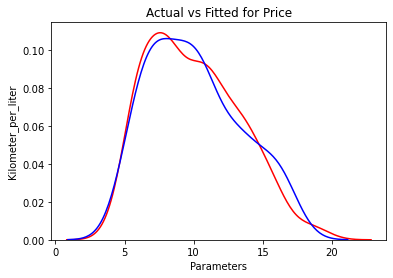

In [51]:
ax1 = sns.distplot(df['Kilometer_per_liter'], hist=False, color='r', label='Actual Values')
sns.distplot(yhat_pr_test, hist=False, color='b', label='Fitted values', ax=ax1)
plt.title('Actual vs Fitted for Price')
plt.xlabel('Parameters')
plt.ylabel('Kilometer_per_liter')
plt.show()

### Step 7:  Cross Validation

In [52]:
lre = LinearRegression()

In [53]:
lre.fit(x_train, y_train)

LinearRegression()

In [54]:
lre.score(x_train, y_train)

0.8081709162389433

In [55]:
lre.score(x_test, y_test)

0.8469962763466173

In [56]:
Rcross = cross_val_score(lre, x_sc, y, cv=5)

In [57]:
Rcross

array([0.57146512, 0.68566715, 0.82348905, 0.68191796, 0.21527776])

### Step 8:  Grid Search for Hyper Parameter Tuning

In [58]:
parameters1 = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]

In [59]:
RR = Ridge()
RR

Ridge()

In [60]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [61]:
Grid1.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [62]:
BestRR= Grid1.best_estimator_
BestRR

Ridge(alpha=1)

In [63]:
BestRR.score(x_test, y_test)

0.8478194554026566